## 연습문제

### **연습1: Chipotle 주문 데이터 이용**
(1)  가장 잘 팔리지 않은 (주문량이 가장 적은) 메뉴 10개를 보여 주세요. 

(2)  가격이 가장 저렴한 메뉴 5개를 보여주세요. 


In [1]:
# 연습: Chipotle 주문 데이터 이용

#데이터 불러오기
import pandas as pd
fpath = 'https://raw.githubusercontent.com/ykjoy/mining/main/chipotle.csv'
df = pd.read_csv(fpath)

In [2]:
#(1)주문량이 가장 적은 메뉴

df.info() #데이터의 열 요소 확인
#주문량은 2번째 열 (1번) quantity
df
#df를 확인해보니, 주문 수량이 한 건인 경우가 너무 많다 
#특정메뉴의 주문량을 산출하려면 item_name이 같은 것을 묶어 길이를 구하거나, 건 수를 세면 될 것 같다.

menusum = df.groupby('item_name').sum()
#print(menusum)을 실행해 메뉴의 목록을 볼 수 있다.
#order_id의 sum은 의미없으니 제거한다 
menusum=menusum[['quantity']] 
#print(menusum) #출력하면 길어져서 주석처리했다.

#menusum의 quanitiy를 오름차순으로 정렬해 주문량이 가장 적은 메뉴 10건을 출력해보자
menusum.sort_values('quantity', ascending = True).head(10)  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,quantity
item_name,
Carnitas Salad,1
Veggie Crispy Tacos,1
Chips and Mild Fresh Tomato Salsa,1
Crispy Tacos,2
Salad,2
Bowl,4
Steak Salad,4
Veggie Salad,6
Carnitas Salad Bowl,6


In [3]:
#(2)가격이 가장 저렴한 메뉴
print(df.head(10))
#정확한 메뉴구성을 알수는 없지만, 선택옵션에 따른 추가금액은 없어보인다
#일단 가격이 적은 순서대로 정렬해보기로 한다

print("\n-------------\n메뉴기준 sum\n-------------")
print( df.groupby('item_name').sum().head())
#이 때, 가격정보는 숫자형이 아니어서 그 결과가 나오지 않는다.
#df에서 가격 열을 빼서 숫자형으로 만들고 다시 df에 넣어준다
df2=df["item_price"].str[1:]  
df2=pd.to_numeric(df2)
df2=pd.concat([df,df2],axis=1)


menusum2=df2.groupby('item_name').sum()
print("\n-----------------------\n메뉴기준 sum (가격추가)\n-----------------------")
print(df2.groupby('item_name').sum().head())
menusum2.sort_values('item_price', ascending = True).head(10)  
#이 때 각 메뉴의 가격은 (가격의 총합)/(총 추문건수)이므로
#데이터프레임 menusum2에다가 apply를 적용해야할 것 같다
menusum2['real_price']=menusum2.apply(lambda x : x["item_price"]/x["quantity"],axis=1)


#저렴한 메뉴 5건
print("\n----------------\n저렴한 메뉴 5건")
print("-----------------------\n메뉴기준 sum (가격/건수)\n        (오름차순 정렬)(단위:$)\n-----------------------------")
menusum3=menusum2.sort_values('real_price', ascending = True).head()
menusum3=menusum3[["real_price"]]
print(menusum3.sort_values('real_price', ascending = True).head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### **연습2: 공공 데이터 이용**
공공 마이데이터 아이디어 제안시 사용하고자 하는 데이터 중 하나를 정해서 다운로드 받으시오. 다운로드 받은 데이터를 구글 드라이브에 업로드 후  앞에서 배운 코드들을 이용하여 (1) 기본적인 기술통계 정보, (2) 데이터 시각화를 통해 데이터를 탐색해 보시오. 


In [4]:
#데이터 불러오기
import pandas as pd
df1=pd.read_csv("https://raw.githubusercontent.com/iecsh10/IT_reno/main/%EC%95%84%EB%8F%99%EB%B3%B5%EC%A7%80%EC%8B%9C%EC%84%A4%EC%88%98_%EB%B0%8F_%EB%B3%B4%ED%98%B8%EC%95%84%EB%8F%99%ED%98%84%ED%99%A9__%EC%8B%9C%EB%8F%84%EB%B3%84_20221005062854.csv",encoding="CP949")
df2=pd.read_csv("https://raw.githubusercontent.com/iecsh10/IT_reno/main/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%82%AC%ED%9A%8C%EB%B3%B5%EC%A7%80%EC%8B%9C%EC%84%A4(%EC%95%84%EB%8F%99%EB%B3%B5%EC%A7%80%EC%8B%9C%EC%84%A4)%20%EB%AA%A9%EB%A1%9D.csv",encoding="CP949")

In [5]:
from traitlets.traitlets import describe
#기본적인 기술통계정보
print("\n-------------------------df1.head()----------------------\n")
print(df1.head())
print("\n---------------------------------------------------------\n")

#기술통계정보 -> mean, 분산, median, 4분위수 등등... 

import pandas as pd
df17=df1[['2017.3']]
df18=df1[['2018.3']]
df19=df1[['2019.3']]
df1789=pd.concat([df17,df18,df19],axis=1)
df1789x0x1=df1789.drop([0,1]) #문차 첫 행, 합계 행 제거 

print("----------------------\n 각 지역 연도별 퇴소자 수 \n -----------------------------")
print(df1789x0x1)
print("\n----------------------\n 각 지역 연도별 퇴소자 수 summary \n------------------------\n")
print(df1789x0x1.describe()) #혹시 이게 숫자가 아니라 문자인가..? 



-------------------------df1.head()----------------------

   행정구역별(1)     2017   2017.1   2017.2        2017.3     2018   2018.1  \
0  행정구역별(1)  시설수 (개)  입소자 (명)  퇴소자 (명)  연말현재 수용자 (명)  시설수 (개)  입소자 (명)   
1        전국      280     5543     6325         12789      279     3707   
2     서울특별시       49     1639     1891          2737       49     1291   
3     부산광역시       21      170      306          1106       20      182   
4     대구광역시       23      270      277           757       23      197   

    2018.2        2018.3     2019   2019.1   2019.2        2019.3  
0  퇴소자 (명)  연말현재 수용자 (명)  시설수 (개)  입소자 (명)  퇴소자 (명)  연말현재 수용자 (명)  
1     4365         12193      281     3776     4304         11665  
2     1451          2577       49     1246     1482          2341  
3      295           992       21      171      232           931  
4      225           729       23      211      243           697  

---------------------------------------------------------

----------------------
 각 지

2    1482
3     232
4     243
5     185
6     114
Name: 2019.2, dtype: object
2    서울특별시
3    부산광역시
4    대구광역시
5    인천광역시
6    광주광역시
Name: 행정구역별(1), dtype: object


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

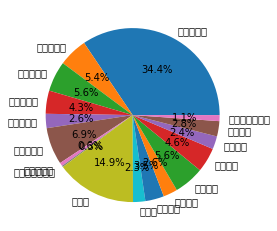

In [6]:
#데이터의 가장 최근 퇴소자의 지역별 비율 -> 파이차트가 효과적

#마지막에서 -1열의 숫자 사용 -> ratio에 저장
#0번째 열 (?)의 행 이름 사용 -> labels에 저장

import pandas as pd
#len(df1.columns)-1
ratio=df1["2019.2"] #ratio
labels=df1["행정구역별(1)"] #labels

#0,1 행은 변수명과 전국 합계 수치이므로 제거 
ratio=ratio.drop([0,1])
labels=labels.drop([0,1])
print(ratio.head())
print(labels.head())

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련
mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 


plt.pie(ratio,labels=labels, autopct='%.1f%%')
plt.show

#깨졌네요.. ^-^


#### 예제 : 서울시 따릉이 대여소별 대여/반납 승객수 정보
-  다음  링크에서 bycl_20220731.csv 화일을 다운로드 받아 구글 드라이드에 업로드 하기   
 https://data.seoul.go.kr/dataList/OA-21229/F/1/datasetView.do

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# csv 데이터 가져오기, 한글 데이터의 경우 인코딩 변경 
bike = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/bycl_20220731.csv", encoding='cp949')

display(bike.head()) # 처음 5행 확인
print(bike.info()) 
print(bike.describe()) 

FileNotFoundError: ignored

In [ ]:
 bike['기준_시간'].plot.hist()

In [ ]:
print('시작 대여소 개수:', len(bike['시작_대여소'].unique()))    # unique: 고유값
 
bike_start= bike.groupby('시작_대여소')['전체건수'].sum()
bike_start_sorted = bike_start.sort_values(ascending=False)[:5]
print(bike_start_sorted)

In [ ]:
bike_start_sorted .plot.bar(rot=45)